In [1]:
%load_ext autoreload
%autoreload 2

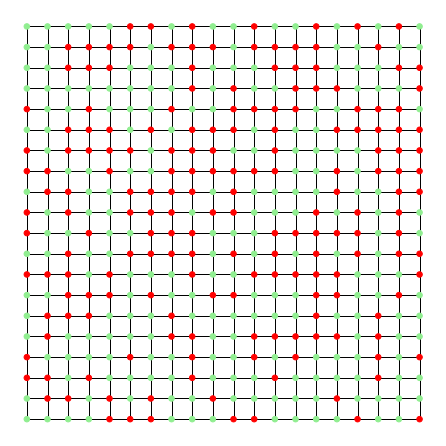

In [21]:
import random
import networkx as nx
import matplotlib
from matplotlib import pyplot as plt

G = nx.grid_2d_graph(20, 20)

plt.figure(figsize=(6, 6))

pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, node_color=[random.choice(('lightgreen', 'red')) for i in range(len(G))],
       with_labels=False,
       node_size=30)


In [3]:
node_list = list(G)
id_dict = dict(zip(node_list, range(len(node_list))))
# def getNode(i):
#     return node_list[i]

# def getId(node):
#     return id_dict[node]
# id_dict

In [8]:
# Define S, I, R
from collections import namedtuple
SIR_Tuple = namedtuple("SIR_Tuple", ["S", "I", "R"])

I = list(range(10)) + [100, 200, 300]
R = list(range(101, 150))
S = [i for i in range(len(node_list)) if i not in I and i not in R]



S = list(map(lambda x: node_list[x], S))
I = list(map(lambda x: node_list[x], I))
R = list(map(lambda x: node_list[x], R))
SIR = SIR_Tuple(S, I, R)


In [9]:
I

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (5, 0),
 (10, 0),
 (15, 0)]

In [19]:
# Background nodes
pos = {(x,y):(y,-x) for x,y in G.nodes()}

def grid_sir(G=G, SIR=SIR_Tuple([], [], []), ax=None):
    # Susceptible
    pos = {(x,y):(y,-x) for x,y in G.nodes()}
    
    susceptible_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=SIR.S, node_color="black", node_size=30, ax=ax) # Node
    susceptible_nodes.set_edgecolor("black") # Node Border

    # Infected
    infected_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=SIR.I, node_size=90, node_color="red", ax=ax) # Node
    infected_nodes.set_edgecolor("black") # Node Border

    # Recovered
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="black")
    recovered_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=SIR.R, node_size=90, node_color="silver",  ax=ax)
    recovered_nodes.set_edgecolor("black")

    # nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)

    # TODO: Draw v1-v2 edges
    edgelist = []
    nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=[], ax=ax)



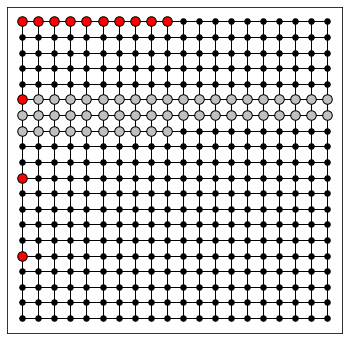

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
grid_sir(SIR=SIR, ax=ax)


In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
def update(num):
    ax.clear()

    grid_sir(G, sir, ax)
    
    # Scale plot ax
    ax.set_title(f"Frame {num}", fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])

ani = matplotlib.animation.FuncAnimation(fig, update, frames=20, interval=500, repeat=True, repeat_delay=1)
plt.show()